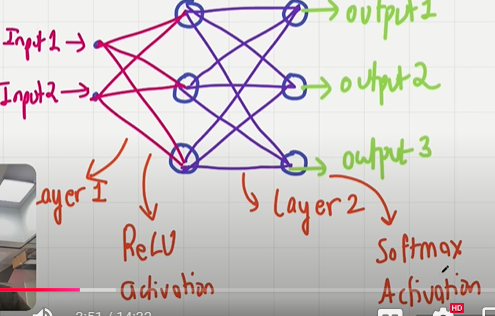


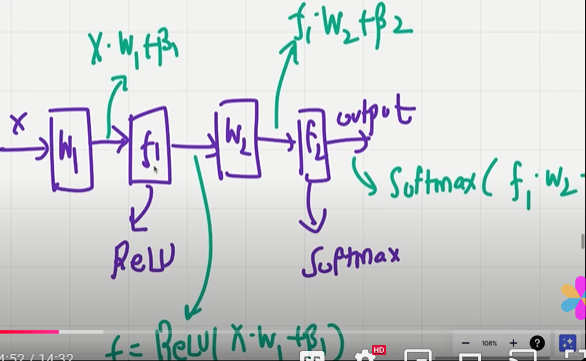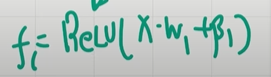

forward pass

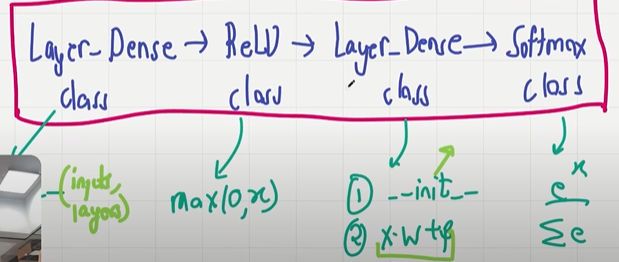

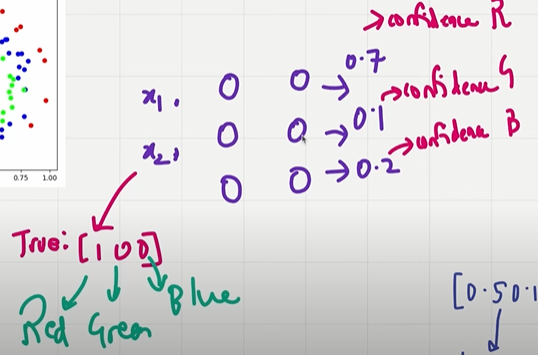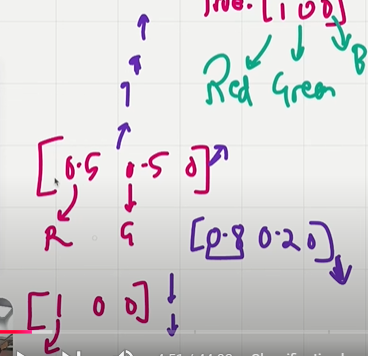

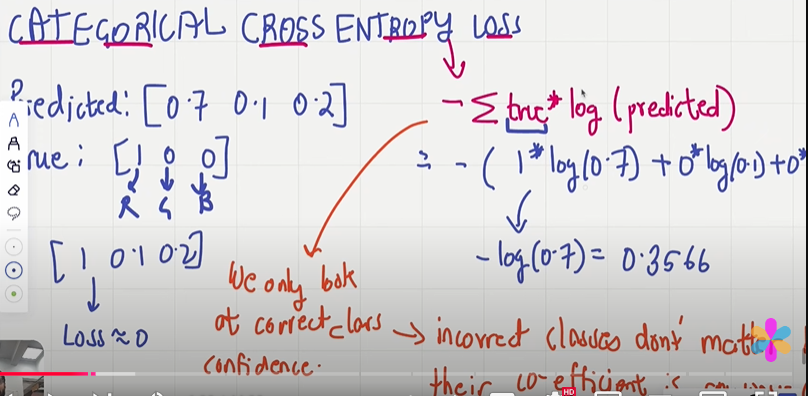

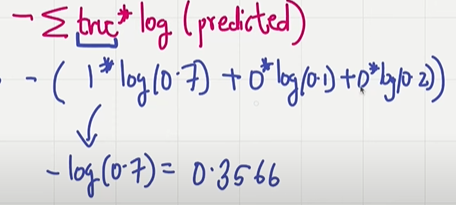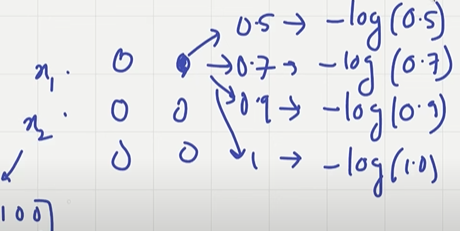

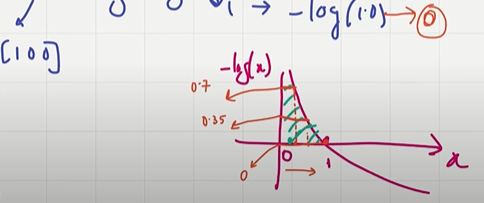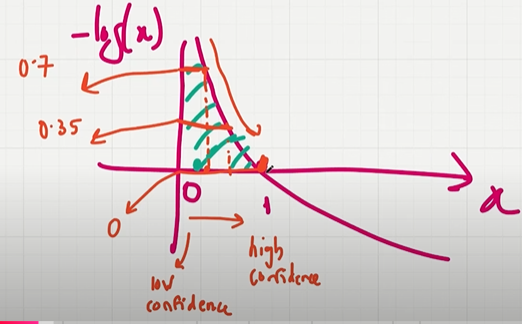

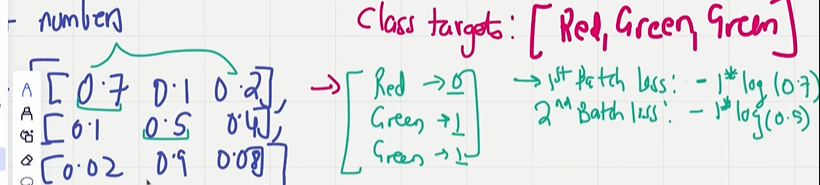

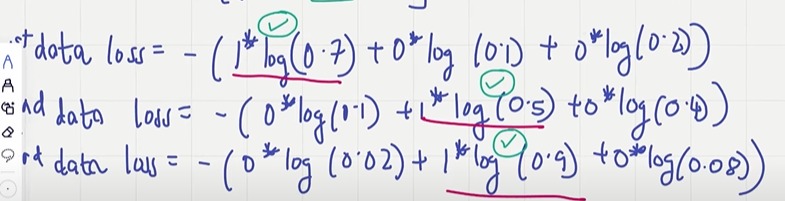

In [ ]:
# actual output 
# [1 0 0 ]
# [0 1 0 ]
# [0 1 0 ]

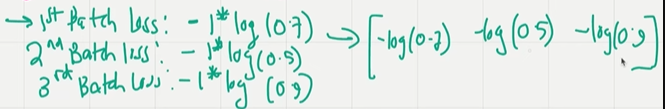

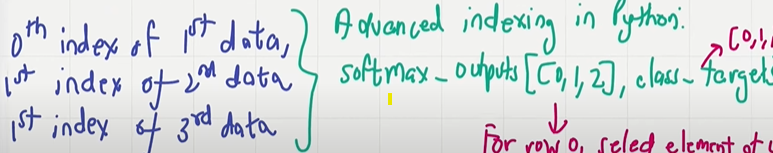

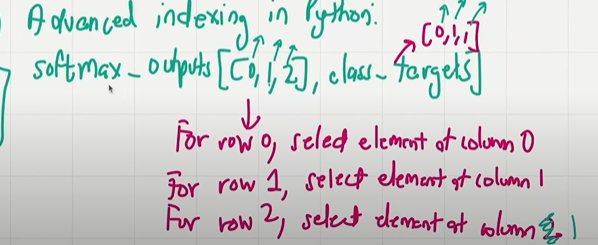

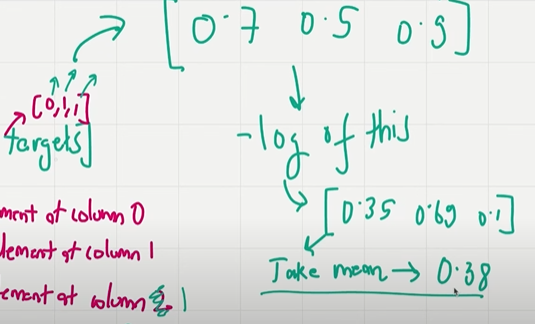

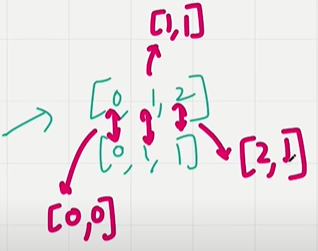

### cross entropy loss

 to calculate the accuracy or neural network  error

In [1]:
import numpy as np

In [4]:
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                            [0.1, 0.5, 0.4],
                            [0.02, 0.9, 0.08]])
class_targets = [0, 1, 1]  # 0 /1st row 0 index , 2nd/1 row 1 index, 3rd/2 row 1 index  .....0,1,2 rows and 0,1,1 columns (0,0),(1,1),(2,1)
class_outputs = softmax_outputs[[0, 1, 2], class_targets]
print(class_outputs) # advance searching element(high confidence value) using index of row and column (0,0),(1,1),(2,1)

[0.7 0.5 0.9]


In [5]:
range(len(softmax_outputs))

range(0, 3)

In [8]:
for i in range(len(softmax_outputs)):
    print(softmax_outputs[i, class_targets[i]])
    print(-np.log(softmax_outputs[i, class_targets[i]]))

0.7
0.35667494393873245
0.5
0.6931471805599453
0.9
0.10536051565782628


In [7]:
log_loss = -np.log(softmax_outputs[
 range(len(softmax_outputs)), class_targets
])
print(log_loss)

[0.35667494 0.69314718 0.10536052]


In [9]:
average_loss = np.mean(log_loss)
print(average_loss)

0.38506088005216804


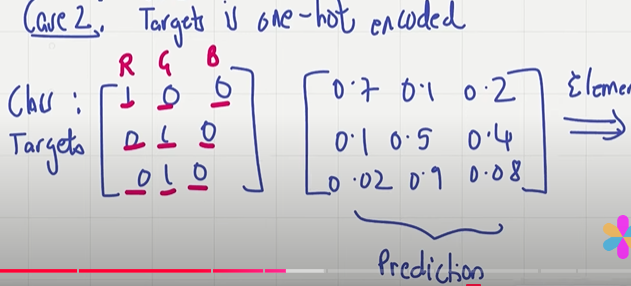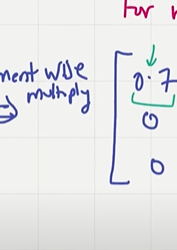

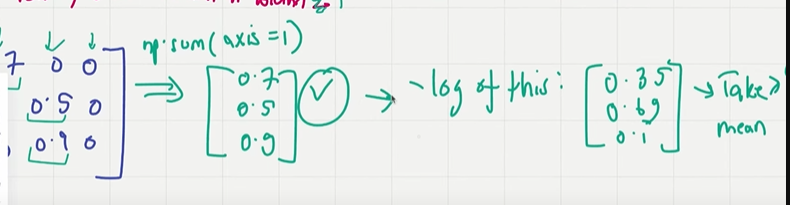

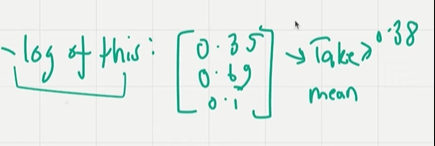

In [13]:
y_true_check = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 1, 0]
])

y_pred_clipped_check = np.array([[0.7, 0.1, 0.2],
                                [0.1, 0.5, 0.4],
                                [0.02, 0.9, 0.08]])

outputs = y_true_check*y_pred_clipped_check # it is simple multiplication elementwise if we use np.dot() then it will be matrix multiplication
print(outputs)

[[0.7 0.  0. ]
 [0.  0.5 0. ]
 [0.  0.9 0. ]]


In [14]:
np.sum(outputs, axis=1)

array([0.7, 0.5, 0.9])

In [18]:
log_losss = -np.log(np.sum(outputs, axis=1))

In [19]:
log_losss

array([0.35667494, 0.69314718, 0.10536052])

In [20]:
np.mean(log_losss)

np.float64(0.38506088005216804)

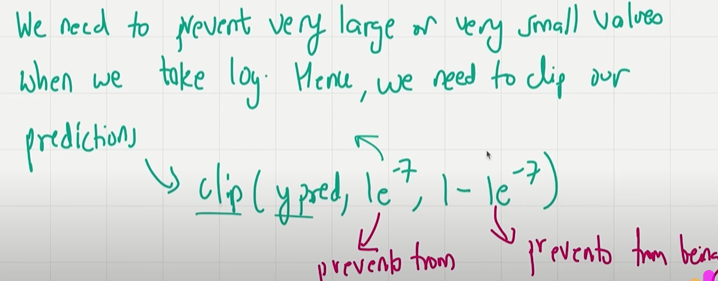

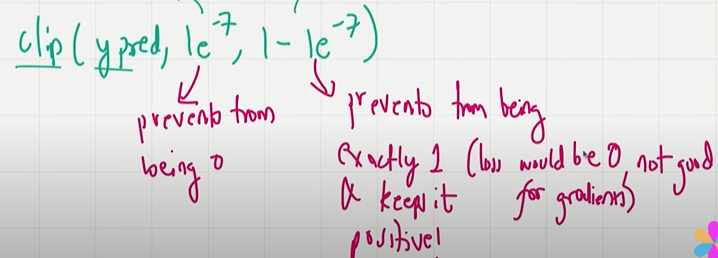

In [80]:
# # Common loss class
class Loss:
#  # Calculates the data and regularization losses
#  # given model output and ground truth values
 def calculate(self, output, y):
#   # Calculate sample losses
  sample_losses = self.forward(output, y)
#   # Calculate mean loss
  data_loss = np.mean(sample_losses)
#   # Return loss
  return data_loss

In [59]:

y_true= np.array([  #array format for one hot encoding lenght == 2 dimension
    [1, 0, 0],
    [0, 1, 0],
    [0, 1, 0]
])

y_pred = np.array([[0.7, 0.1, 0.2],
                    [0.1, 0.5, 0.4],
                    [0.0, 1.0, 0.08]])

In [60]:
y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
y_pred_clipped

array([[7.000000e-01, 1.000000e-01, 2.000000e-01],
       [1.000000e-01, 5.000000e-01, 4.000000e-01],
       [1.000000e-07, 9.999999e-01, 8.000000e-02]])

In [61]:
samples = len(y_pred) # no of batch == no of rows
samples

3

In [62]:
# y_true_list = [0, 1, 1]#list format  lenght == 1 dimension
y_true_list = np.array([0, 1, 1])  ## only if categorical labels

In [63]:
y_true_list.shape

(3,)

In [64]:
len(y_true_list.shape)

1

In [65]:
mult = y_pred_clipped[range(samples),y_true_list]

In [66]:
mult

array([0.7      , 0.5      , 0.9999999])

In [67]:
y_true.shape

(3, 3)

In [68]:
len(y_true.shape) ##array format for one hot encoding lenght == 2 dimension

2

In [69]:
#  Mask values - only for one-hot encoded labels
correct_confidences = np.sum(
y_pred_clipped*y_true,
axis=1
)
correct_confidences

array([0.7      , 0.5      , 0.9999999])

In [73]:
negative_log_likelihoods = -np.log(correct_confidences)
print(negative_log_likelihoods)
print(np.mean(negative_log_likelihoods))

[3.56674944e-01 6.93147181e-01 1.00000005e-07]
0.34994074149956095


In [85]:
# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss): # inheritence
 # Forward pass
 def forward(self, y_pred, y_true):                 
  # Number of samples in a batch
  samples = len(y_pred)
  # Clip data to prevent division by 0
  # Clip both sides to not drag mean towards any value
  y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
  # Probabilities for target values -
  # only if categorical labels
  if len(y_true.shape) == 1:
   correct_confidences = y_pred_clipped[
   range(samples),
   y_true
   ]
  # Mask values - only for one-hot encoded labels
  elif len(y_true.shape) == 2:
   correct_confidences = np.sum(
   y_pred_clipped*y_true,
   axis=1
   )
 # Losses
  negative_log_likelihoods = -np.log(correct_confidences)
  return negative_log_likelihoods

In [92]:
# Cross-entropy loss
class Loss_Categorical_Crossentropy:
 # Forward pass
  def forward(self, y_pred, y_true):                 
    # Number of samples in a batch
    samples = len(y_pred)
    # Clip data to prevent division by 0
    # Clip both sides to not drag mean towards any value
    y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
    # Probabilities for target values -
    # only if categorical labels
    if len(y_true.shape) == 1:
      correct_confidences = y_pred_clipped[
      range(samples),
      y_true
      ]
    # Mask values - only for one-hot encoded labels
    elif len(y_true.shape) == 2:
      correct_confidences = np.sum(
      y_pred_clipped*y_true,
      axis=1
      )
    negative_log_likelihoods = -np.log(correct_confidences)
    return negative_log_likelihoods
  # Losses
  def calculate(self,y_pred, y_true):
    correct_confidences = self.forward(y_pred, y_true)
    return np.mean(correct_confidences)
    

In [86]:
L1 = Loss_CategoricalCrossentropy()

In [87]:
L1.forward(y_pred,y_true)

array([3.56674944e-01, 6.93147181e-01, 1.00000005e-07])

In [88]:
# L2= Loss()

In [89]:
# L2.calculate(y_pred,y_true)

AttributeError: 'Loss' object has no attribute 'forward'

In [90]:
L1.calculate(y_pred,y_true)

np.float64(0.34994074149956095)

In [93]:
L3 = Loss_Categorical_Crossentropy()

In [94]:
L3.calculate(y_pred,y_true)

np.float64(0.34994074149956095)

In [96]:
from nnfs.datasets import spiral_data
import numpy as np
import nnfs
nnfs.init()

In [97]:
from Dense_Layer import Layer_Dense
from ReLU_Act import Activation_ReLU
from Softmax_Act import Activation_Softmax
from Cat_Crossentropy_Loss import Loss_Categorical_Crossentropy

In [98]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)
# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)
# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()
# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values
dense2 = Layer_Dense(3, 3)
# Create Softmax activation (to be used with Dense layer):
activation2 = Activation_Softmax()
# Create loss function
loss_function = Loss_Categorical_Crossentropy()
# Perform a forward pass of our training data through this layer




dense1.forward(X)
# Perform a forward pass through activation function
# it takes the output of first dense layer here
activation1.forward(dense1.output)

# Perform a forward pass through second Dense layer
# it takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)
# Perform a forward pass through activation function
# it takes the output of second dense layer here
activation2.forward(dense2.output)
# Let's see output of the first few samples:
print(activation2.output[:5])
# Perform a forward pass through activation function
# it takes the output of second dense layer here and returns loss
loss = loss_function.calculate(activation2.output, y)
# Print loss value
print('loss:', loss)

# Calculate accuracy from output of activation2 and targets
# calculate values along first axis
# predictions = np.argmax(activation2.output, axis=1)
# if len(y.shape) == 2:
#  y = np.argmax(y, axis=1)
# accuracy = np.mean(predictions == y)
# # Print accuracy
# print('acc:', accuracy)

[[0.33333334 0.33333334 0.33333334]
 [0.3333332  0.3333332  0.33333364]
 [0.3333329  0.33333293 0.3333342 ]
 [0.3333326  0.33333263 0.33333477]
 [0.33333233 0.3333324  0.33333528]]
loss: 1.0986104
